<a href="https://colab.research.google.com/github/aminever/Quantitative-finance-simultaions/blob/main/Ornstein_Uhlenbeck_Maximum_likelihood_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats

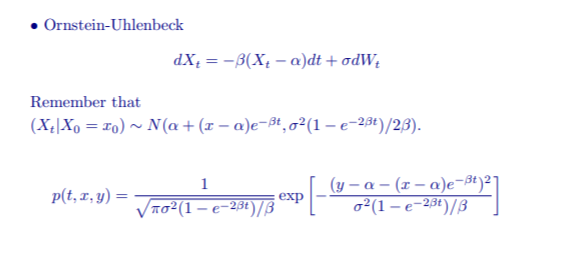

In [34]:
beta = -0.5
alpha = -0.5
sigma = 0.2
X0=0.5
T=1
N=100
M=100

Some simulations with the parameters above

0.6188713553665312

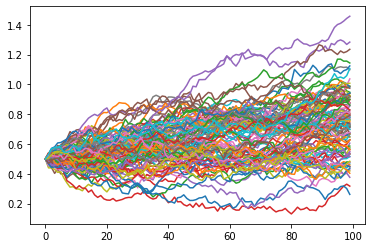

In [39]:
time= np.linspace(0,T,N)
dt=time[1]-time[0]
X = np.zeros((M,N))
X[:,0]=X0
for i in range(1,N):
  dW = np.sqrt(dt)*np.random.randn(M)
  dX = -beta*(X[:,i]-alpha)*dt+sigma*dW
  X[:,i]=X[:,i-1]+dX
for i in range(M):
  plt.plot(X[i,:])
X.mean()

Log-Likelihood function definition

In [36]:
def loglikelihood(beta,alpha,sigma,epsilon=10**(-300)):
  loglikeli=0
  dt = time[1]-time[0]
  for j in range(M):
    for i in range(1,N):
      y= X[j,i]
      x = X[j,i-1]
      mean = alpha+(x-alpha)*np.exp(-beta*dt)
      variance = (sigma**2) *(1-np.exp(-2*beta*dt))/(2*beta)
      loglikeli = loglikeli + np.log(scipy.stats.norm.pdf(y,mean,np.sqrt(variance)))
  return loglikeli


In [40]:
options = {'maxiter': 250, 'gtol': 1e-06, 'xtol': 1e-04, 'verbose': 1}
function_to_optimize = lambda w :-loglikelihood(w[0],w[1],w[2])
method = 'trust-constr'  # optimization method to use
res = scipy.optimize.minimize(lambda w: function_to_optimize(w),(0.01,-0.65,0.2),tol=5e-02,method=method,bounds=((-1,1),(-1,1),(0,1)),options=options)


`xtol` termination condition is satisfied.
Number of iterations: 77, function evaluations: 340, CG iterations: 159, optimality: 1.76e-02, constraint violation: 0.00e+00, execution time: 7.3e+02 s.


In [38]:
res.x

array([0.59441319, 0.99997933, 0.20224067])

The found parameters that fit with the artificial data are beta =0.55 alpha = 0.99 and  sigma =0.2
We can conclude on the effectivness of this method on the noise term but not in the drift one